# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

# Generowanie losowych punktów na płaszczyźnie

In [5]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """

    # Zoptymalizowac generowanie randomowych punktow

    points = []
    for i in range(n):
        x = np.random.uniform(left, right)
        y = np.random.uniform(left, right)
        points.append((x, y))

    return points

<span style="color:red">1.</span> Genracja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$.

In [6]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

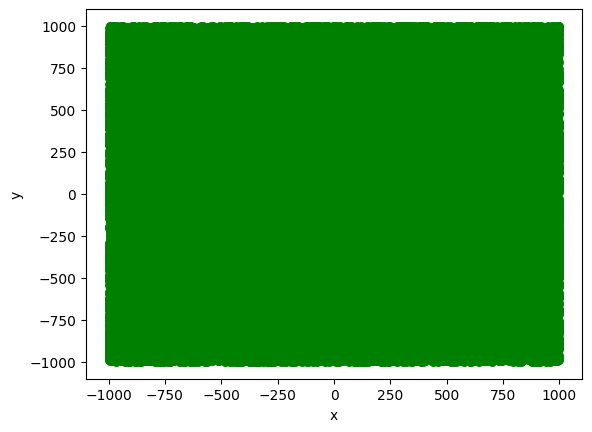

In [7]:
draw_points(points_a)

<span style="color:red">2.</span> Generacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$.

In [8]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

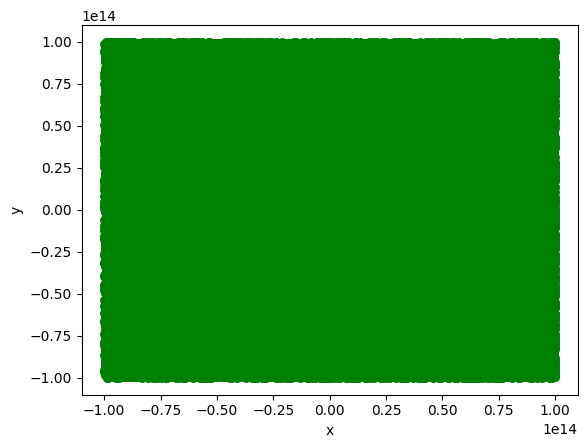

In [9]:
draw_points(points_b)

### Generacja lososwych punktów na okręgu.

In [10]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []
    for _ in range(n):
        angle = 2 * np.pi * np.random.uniform()
        points.append((R * np.cos(angle), R * np.sin(angle)))
    return points

<span style="color:red">3.</span> Generacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

In [11]:
points_c = generate_circle_points((0, 0), 100)

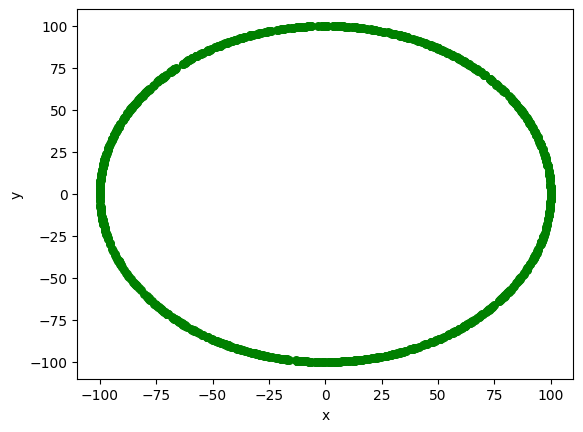

In [12]:
draw_points(points_c)

### Generacja punktów współliniowych.

In [13]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

    points = []
    xt = b[0] - a[0]
    yt = b[1] - a[1]
    for i in range(n):
        t = np.random.uniform()
        points.append((xt * t + a[0], yt * t + a[1] ))
    
    return points

<span style="color:red">4.</span>  Generacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ dla $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$.   
Gdzie $ a = (-1.0, 0.0)$, $ b = (1.0, 0.1)$.

In [14]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

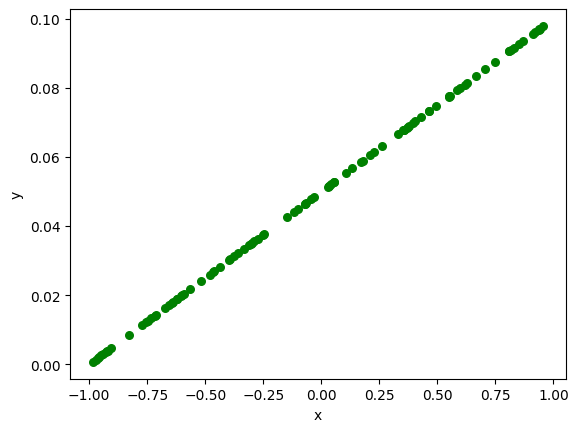

In [15]:
draw_points(points_d)

# Porównanie funkcji wyliczających wyznacznik.

In [17]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0] * (b[1] - c[1]) - a[1] * (b[0] - c[0]) + b[0] * c[1] - b[1] * c[0]

In [18]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M = np.array([[a[0],a[1], 1],
                  [b[0], b[1], 1],
                  [c[0], c[1], 1]
                  ])

    return np.linalg.det(M)

In [19]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0] - c[0]) * (b[1] - c[1]) - ((a[1] - c[1]) * (b[0] - c[0]))

In [20]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M = np.array([[a[0] - c[0], a[1] - c[1]],
                  [b[0] - c[0], b[1] - c[1]]
                  ])
    
    return np.linalg.det(M)

<span style="color:red">5.</span> Implementacja funkcji kategoryzującej punkty odnośnie ich położenia względem prostej.

In [22]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """

    categories = [[], [], []]
    for c in points:
        det = mat_det_func(a,b,c)
        if abs(det) < eps: 
            categories[1].append(c)
        elif det > 0:
            categories[0].append(c)
        else:
            categories[2].append(c)

    return categories

In [23]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

#### Wizualizacja sklasyfikowanych punktów. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

<span style="color:red">6.</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-1000,1000\right]^{2}$.

In [24]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 1)

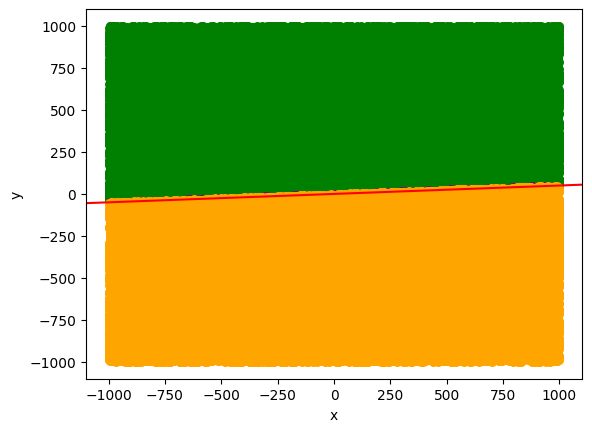

In [25]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

<span style="color:red">7.</span> Kategoryzacja $10^5$ losowych punktów w przestrzeni $\mathbb{R}^2$ o współrzędnych z przedziału $(x, y) \in \left[-10^{14},10^{14}\right]^{2}$.

In [26]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

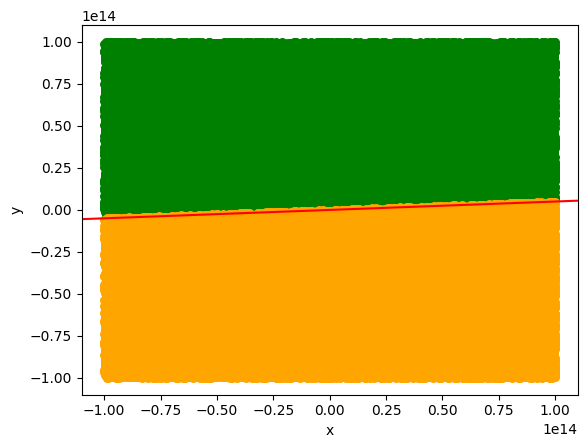

In [27]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

<span style="color:red">8.</span> Kategoryzacja $ 1000$ losowych punktów w przestrzeni $\mathbb{R}^2$ leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

In [28]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

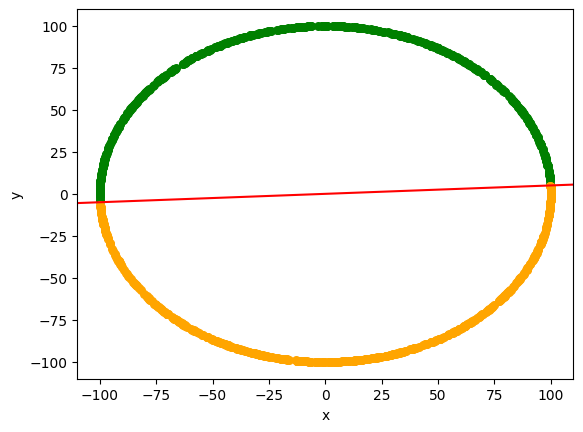

In [29]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

<span style="color:red">10.</span>  Kategoryzacja $ 1000$ losowych punktów leżących na prostej.

In [30]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

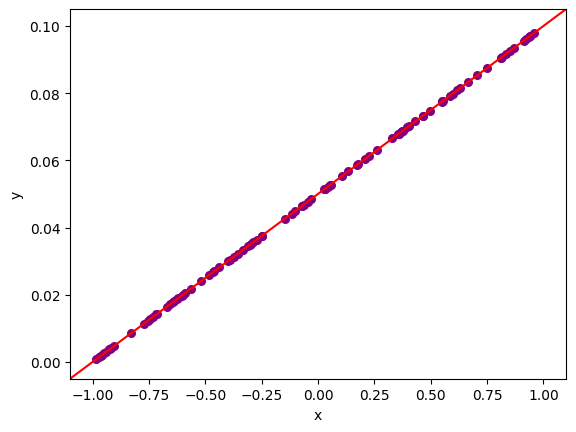

In [31]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [32]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
